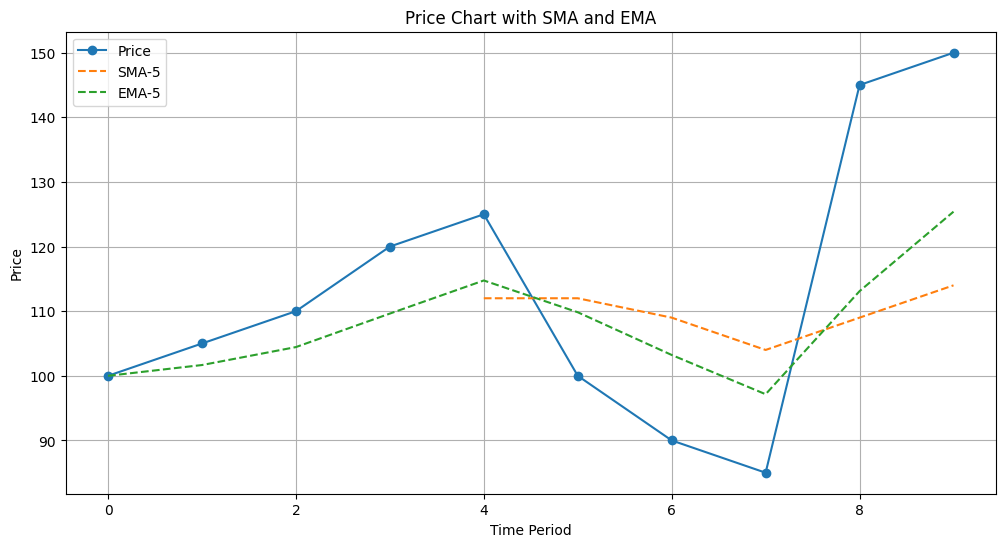

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample price data
prices = [100, 105, 110, 120, 125, 100, 90, 85, 145, 150]

# Calculate SMA and EMA
window = 5  # Adjust the window size as needed
sma = pd.Series(prices).rolling(window=window).mean()
ema = pd.Series(prices).ewm(span=window, adjust=False).mean()

# Plot the original prices and moving averages
plt.figure(figsize=(12, 6))
plt.plot(prices, label='Price', marker='o')
plt.plot(sma, label=f'SMA-{window}', linestyle='--')
plt.plot(ema, label=f'EMA-{window}', linestyle='--')

plt.title('Price Chart with SMA and EMA')
plt.xlabel('Time Period')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
import yfinance as yf
data = yf.download(tickers='BTC-USD', period='max', interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [4]:
import pandas_ta as ta
data.ta.adx(high='High', low='Low', close='Close', length=14, append=True)

,ADX_14,DMP_14,DMN_14
Date,,,
2014-09-17,NaN,NaN,NaN
2014-09-18,NaN,NaN,NaN
2014-09-19,NaN,NaN,NaN
2014-09-20,NaN,NaN,NaN
2014-09-21,NaN,NaN,NaN
...,...,...,...
2024-05-25,22.579850,22.921823,15.974158
2024-05-26,22.034310,22.053729,16.319839
2024-05-27,22.017825,23.692259,15.210163


In [5]:
data

,Open,High,Low,Close,Adj Close,Volume,ADX_14,DMP_14,DMN_14
Date,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,NaN,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,NaN,NaN
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,NaN,NaN
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-05-25,68526.921875,69579.320312,68515.820312,69265.945312,69265.945312,15473071741,22.579850,22.921823,15.974158
2024-05-26,69264.289062,69506.226562,68183.890625,68518.093750,68518.093750,15628433737,22.034310,22.053729,16.319839
2024-05-27,68512.179688,70597.882812,68232.500000,69394.554688,69394.554688,25870990717,22.017825,23.692259,15.210163


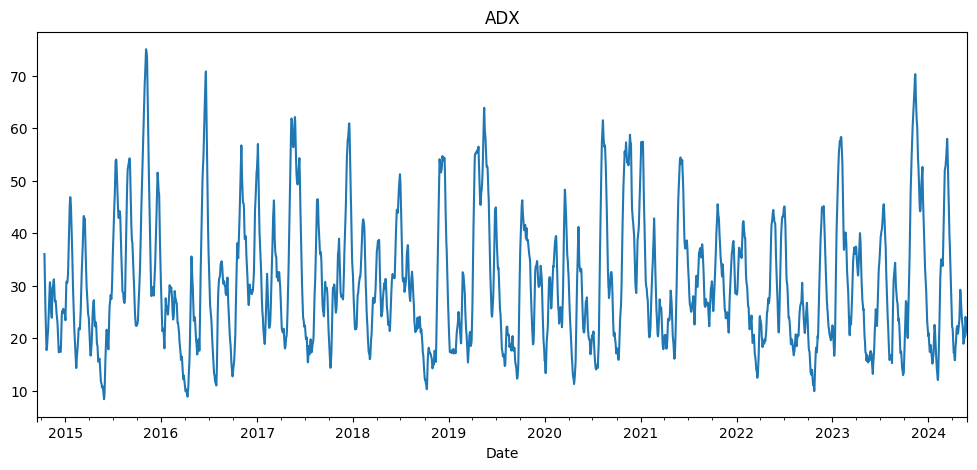

In [6]:
plt.figure(figsize=(12,5))
plt.title('ADX')
data['ADX_14'].plot()
plt.show()

In [7]:
import plotly.graph_objects as go
df = data[:500]
fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'],
                name='OHLC'),
                go.Scatter(x=df.index, y=df['ADX_14'], name='ADX', yaxis='y2')
                ])

fig.update_layout(
    title='OHLC with ADX(14)',
    yaxis=dict(
        domain=[0.2, 1]
    ),
    yaxis2=dict(
        domain=[0, 0.2],
        anchor='free',
        overlaying='y',
        side='right',
        title='ADX'
    ))

fig.show()
